<a href="https://colab.research.google.com/github/CS222-UIUC/course-project-fhannon/blob/main/CodeAdaAI_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-Demo #1: Supervised Learning
Supervised Learning occurs when the data you feed a model has labels. In this case, the data is seperated by x and y, which are the hours studied vs score.

This model uses linear regression to estimate the true relationship of the data. This kinda looks like y=mx+b, where the model creates a line of best fit through the given data points.

At the end of the day, machine learning is math! But the math behind it can get complicated real fast.
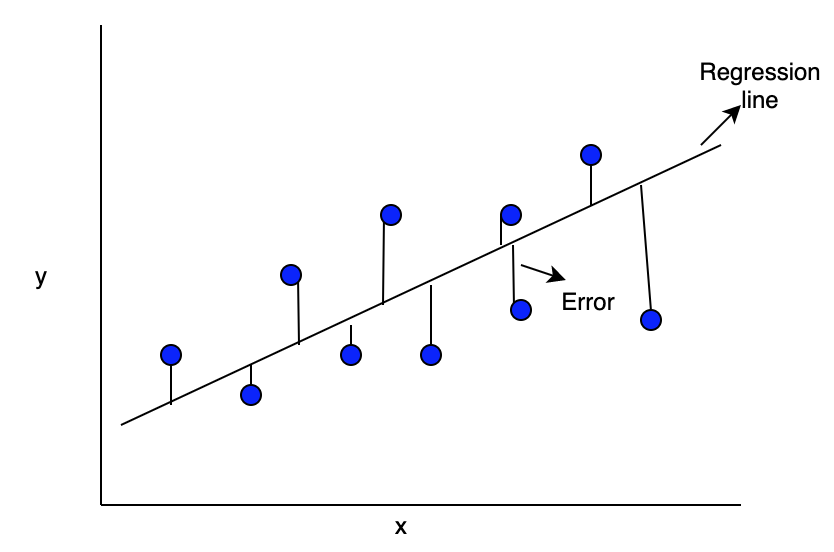

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

#hours studied vs score
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([40, 50, 60, 70, 80])

model = LinearRegression()
model.fit(X, y)

print("Predicted score for 6 hours:", model.predict([[100]])[0]) #try out some more values!! find the limits of the model :(

Predicted score for 6 hours: 1029.9999999999998


# Mini-Demo #2: Building a ML Model
When you build a model, there are a lot of steps you should follow!
1. Find a dataset! It is actually so important that the data you choose to use is from a legit source. Bad data = bad model!
2. Explore the data (EDA): sometimes there are some hidden insights you can get before training a model. i.e. are some variables related to each other?
3. Clean your data! A model works best when the data you give it doesn't have errors or null values.
4. Train your model. Use a classifier that you think best fits your data. For example, if you think your data follows a linear distribution, maybe look into linear regression (like above). This is why EDA is so important!
5. Test your model!

Here is a helpful visual to help choose a model:

ml_map.svg

In [ ]:
import pandas as pd

#load Titanic dataset from seaborn
import seaborn as sns
titanic = sns.load_dataset("titanic")

# show first few rows
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
#explore your data
titanic.info()
titanic.describe() #do you see places with a lot of null values?
titanic["survived"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,count
survived,
0,549
1,342


In [ ]:
#clean your data

#drop rows with missing target
titanic = titanic.dropna(subset=["survived"])

# fill missing ages with median value
titanic["age"] = titanic["age"].fillna(titanic["age"].median())

# convert categorical columns to numeric
titanic = pd.get_dummies(titanic, columns=["sex", "class", "embarked"], drop_first=True)
#some of these had too many missing values or are basically the same as others, which is why we dropped them
titanic = titanic.drop(["deck", "embark_town", "alive", "who", "adult_male", "alone"], axis=1)


# Mini-Demo #3: Train, Test, and Improve Your Model
Use train test split to break the data into training and testing parts
*   This can be very helpful when we test the model later on! We don't want the model to be tested on things it already knows


In this example, we are using Logistic Regression. Logistic Regression aims to classify the output into a binary value. In this case, we want to see if a person survived or not.

Use your newly trained model and test it with the test set you put aside. From here you can get the **accuracy** of the model.

The **confusion matrix** is something that tells us how many predictions we made right

The **classifcation report** contains other statistics that can help you decide how your model did.


How to improve this model:
* Create new variables (Feature Engineering) like
   family_size = sibsp + parch + 1
* Try different models: Random Forest Classifier, XGBoost, etc.



In [ ]:
#train your model!!!! We will use logistic regression for this example

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# split data
X = titanic.drop("survived", axis=1)
y = titanic["survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train) #yay you just fit a model!

LogisticRegression(max_iter=1000)

In [ ]:
#test your model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#predict on test data
y_pred = model.predict(X_test)

#evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred)) # how can we make this better?
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7988826815642458
Confusion Matrix:
 [[90 15]
 [21 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



# Mini-Demo #4: API Connection
Sometimes you don't need to make a whole model, especially if it has been done before!
* Using pretrained models trained on large datasets can save a lot of time, especially during hackathons!

You can connect to them via API calls!
* Can be a great way to connect a model to a website or application

ex.
Using ChatGPT API to create a app where people can get personalized recipies based on ingredients that they have.

In [ ]:
!pip install -q transformers torch #will take a min
import re
# Import pipeline from Hugging Face Transformers
from transformers import pipeline

#Load models
generator = pipeline("text-generation", model="distilgpt2") #free version of GPT2 without the need for a paid API key
classifier = pipeline("sentiment-analysis")

# Text Generation Demo — sentence finisher
print("\nsentence finisher generator")
words = input("Enter a sentence you want finished ")

prompt = f"Finish this sentence: {words} " #prompt can help you focus the AI to give certain answers
result = generator(prompt, max_length=40, num_return_sequences=1)
text = result[0]["generated_text"]
text = re.sub(r'\s+', ' ', text.strip()) #cleaning the output

print("\n " + text)

# Sentiment Analysis Demo
print("\n Sentiment Analysis")
text = input("Type a short sentence to analyze sentiment: ")

sentiment = classifier(text)[0]
print(f"Result → {sentiment['label']} (confidence: {sentiment['score']:.2f})")

KeyboardInterrupt: 